In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras

2023-09-21 21:21:49.241338: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
df = pd.read_csv('/Users/kimjuhwan/Desktop/data/car+evaluation/car_data.txt', header=None)
df.columns=["buying", "maint", "doors", "persons", "lug_boot", "safety", "car_evaluation"]
df

,buying,maint,doors,persons,lug_boot,safety,car_evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.isnull().sum()

buying            0
maint             0
doors             0
persons           0
lug_boot          0
safety            0
car_evaluation    0
dtype: int64

In [8]:
replacement_dict1 = {'vhigh': 4, 'high': 3, 'med': 2, 'low': 1}
replacement_dict2 = {'2': 1, '4': 2, 'more': 3}
replacement_dict3 = {'low': 1, 'med': 2, 'high': 3}
replacement_dict4 = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}
replacement_dict5 = {'2': 1, '3': 2, '4': 3, '5more': 4}
replacement_dict6 = {'small': 1, 'med': 2, 'big': 3}

df['buying'] = df['buying'].replace(replacement_dict1)
df['maint'] = df['maint'].replace(replacement_dict1)
df['persons'] = df['persons'].replace(replacement_dict2)
df['safety'] = df['safety'].replace(replacement_dict3)
df['doors'] = df['doors'].replace(replacement_dict5)
df['lug_boot'] = df['lug_boot'].replace(replacement_dict6)
df['car_evaluation'] = df['car_evaluation'].replace(replacement_dict4)

In [9]:
df.columns

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety',
       'car_evaluation'],
      dtype='object')

In [10]:
df.isna().sum()

buying            0
maint             0
doors             0
persons           0
lug_boot          0
safety            0
car_evaluation    0
dtype: int64

In [11]:
df

,buying,maint,doors,persons,lug_boot,safety,car_evaluation
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,3
1724,1,1,4,3,2,3,4
1725,1,1,4,3,3,1,1
1726,1,1,4,3,3,2,3


Text(0.5, 1.0, 'Label')

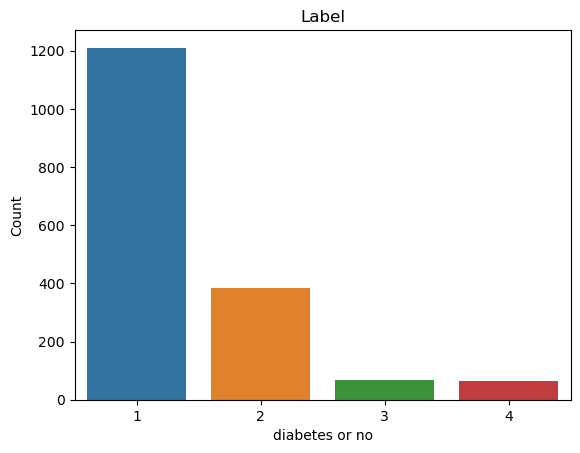

In [12]:
sns.countplot(data=df, x='car_evaluation')
plt.xlabel('diabetes or no')
plt.ylabel('Count')
plt.title('Label')

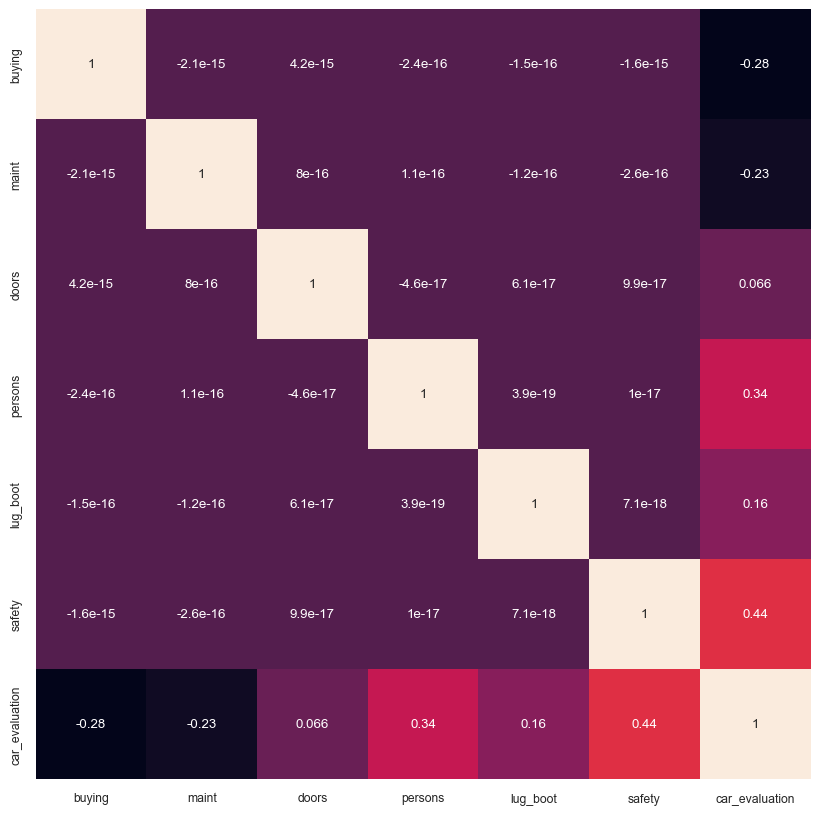

In [13]:
df_corr = df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [14]:
df['buying'] = pd.to_numeric(df['buying'])
df['maint'] = pd.to_numeric(df['maint'])
df['persons'] = pd.to_numeric(df['persons'])
df['safety'] = pd.to_numeric(df['safety'])
df['doors'] = pd.to_numeric(df['doors'])
df['lug_boot'] = pd.to_numeric(df['lug_boot'])
df['car_evaluation'] = pd.to_numeric(df['car_evaluation'])

In [15]:
df

,buying,maint,doors,persons,lug_boot,safety,car_evaluation
0,4,4,1,1,1,1,1
1,4,4,1,1,1,2,1
2,4,4,1,1,1,3,1
3,4,4,1,1,2,1,1
4,4,4,1,1,2,2,1
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,3
1724,1,1,4,3,2,3,4
1725,1,1,4,3,3,1,1
1726,1,1,4,3,3,2,3


In [16]:
X = df.iloc[:,0:5].values
y = df.iloc[:,6].values

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [17]:
X

array([[4, 4, 1, 1, 1],
       [4, 4, 1, 1, 1],
       [4, 4, 1, 1, 1],
       ...,
       [1, 1, 4, 3, 3],
       [1, 1, 4, 3, 3],
       [1, 1, 4, 3, 3]])

In [18]:
Y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [19]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

model = Sequential()

model.add(Dense(8, input_shape=(5,), activation='relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(4, activation='sigmoid'))

model.compile(Adam(lr=0.02), 'categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 48        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 4)                 36        
                                                                 
Total params: 228
Trainable params: 228
Non-trainable params: 0
_________________________________________________________________


2023-09-21 21:21:52.490752: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [20]:
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

Epoch 1/100
44/44 [==============================] - 0s 3ms/step - loss: 0.7518 - accuracy: 0.6903 - val_loss: 0.6713 - val_accuracy: 0.6879
Epoch 2/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6596 - accuracy: 0.7113 - val_loss: 0.6664 - val_accuracy: 0.6994
Epoch 3/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6244 - accuracy: 0.6997 - val_loss: 0.7192 - val_accuracy: 0.6908
Epoch 4/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6183 - accuracy: 0.6997 - val_loss: 0.6467 - val_accuracy: 0.6850
Epoch 5/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6322 - accuracy: 0.7019 - val_loss: 0.7202 - val_accuracy: 0.6936
Epoch 6/100
44/44 [==============================] - 0s 1ms/step - loss: 0.6126 - accuracy: 0.6990 - val_loss: 0.6646 - val_accuracy: 0.6792
Epoch 7/100
44/44 [==============================] - 0s 1ms/step - loss: 0.5989 - accuracy: 0.6997 - val_loss: 0.6717 - val_accuracy: 0.6936
Epoch 8/100
4

Epoch 59/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4710 - accuracy: 0.7453 - val_loss: 0.4558 - val_accuracy: 0.7341
Epoch 60/100
44/44 [==============================] - 0s 997us/step - loss: 0.4547 - accuracy: 0.7590 - val_loss: 0.4811 - val_accuracy: 0.7370
Epoch 61/100
44/44 [==============================] - 0s 999us/step - loss: 0.4613 - accuracy: 0.7562 - val_loss: 0.4728 - val_accuracy: 0.7312
Epoch 62/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4989 - accuracy: 0.7373 - val_loss: 0.5083 - val_accuracy: 0.7370
Epoch 63/100
44/44 [==============================] - 0s 999us/step - loss: 0.4755 - accuracy: 0.7525 - val_loss: 0.4729 - val_accuracy: 0.7341
Epoch 64/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4566 - accuracy: 0.7554 - val_loss: 0.5016 - val_accuracy: 0.7312
Epoch 65/100
44/44 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7496 - val_loss: 0.4663 - val_accuracy: 0.7168


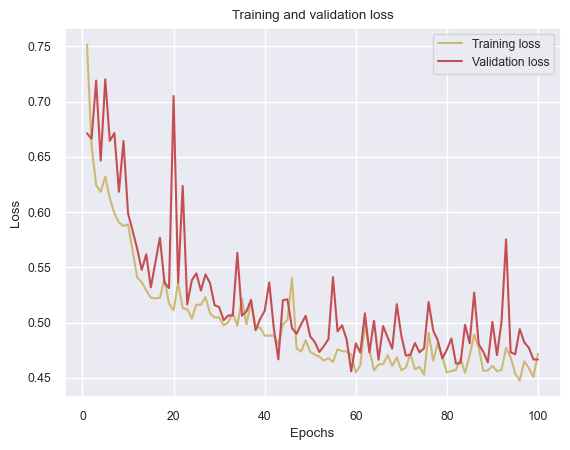

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss=model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

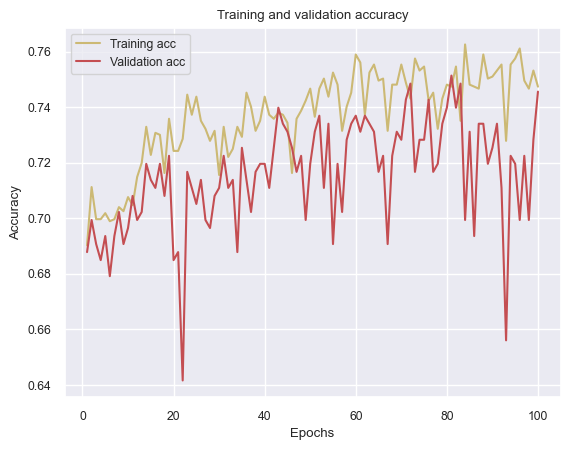

In [22]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test_class, y_pred_class))
print(confusion_matrix(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       240
           1       0.55      0.59      0.57        79
           2       0.42      0.76      0.54        17
           3       0.00      0.00      0.00        10

    accuracy                           0.75       346
   macro avg       0.46      0.55      0.49       346
weighted avg       0.74      0.75      0.74       346

[[198  33   9   0]
 [ 28  47   4   0]
 [  4   0  13   0]
 [  0   5   5   0]]


/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/kimjuhwan/opt/anaconda3/envs/gcproject/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera